<a href="https://colab.research.google.com/github/rakso-dev/TIA_proyecto/blob/main/proyecto_TIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
train_dir = "drive/MyDrive/TIA_proyecto/DATASET/TRAIN"
test_dir = "drive/MyDrive/TIA_proyecto/DATASET/TEST"

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(width_shift_range= 0.1,
                                  horizontal_flip = True,
                                  rescale = 1./255,
                                  validation_split = 0.2)
test_datagen = ImageDataGenerator(rescale = 1./255,
                                 validation_split = 0.2)

train_generator =  train_datagen.flow_from_directory(directory = train_dir,
                                                    target_size = (150,100),
                                                    color_mode = 'grayscale',
                                                    class_mode = 'categorical',
                                                    batch_size = 16,
                                                    subset = 'training')
validation_generator  = test_datagen.flow_from_directory(directory = test_dir,
                                                  target_size = (150,100),
                                                  color_mode = 'grayscale',
                                                  class_mode = 'categorical',
                                                  subset = 'validation')

Found 866 images belonging to 5 classes.
Found 92 images belonging to 5 classes.


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

model = Sequential()
model.add(Conv2D(32, (5,5), input_shape=(150, 100, 1), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(64, (5,5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (5,5), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 146, 96, 32)       832       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 48, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 69, 44, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 34, 22, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 18, 128)       204928    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 9, 128)       0

In [5]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

In [6]:
history = model.fit(train_generator, epochs = 35, validation_data=validation_generator)

Epoch 1/35
22/55 [===========>..................] - ETA: 27s - loss: 1.7661 - accuracy: 0.2485

/usr/local/lib/python3.8/dist-packages/PIL/Image.py:959: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


55/55 [==============================] - 51s 918ms/step - loss: 1.6593 - accuracy: 0.2517 - val_loss: 1.5228 - val_accuracy: 0.2826
Epoch 2/35
55/55 [==============================] - 49s 877ms/step - loss: 1.4436 - accuracy: 0.3961 - val_loss: 0.9897 - val_accuracy: 0.6087
Epoch 3/35
55/55 [==============================] - 52s 935ms/step - loss: 1.2473 - accuracy: 0.5196 - val_loss: 0.7123 - val_accuracy: 0.6957
Epoch 4/35
55/55 [==============================] - 48s 874ms/step - loss: 1.0464 - accuracy: 0.5912 - val_loss: 0.3967 - val_accuracy: 0.8370
Epoch 5/35
55/55 [==============================] - 48s 868ms/step - loss: 0.8681 - accuracy: 0.6651 - val_loss: 0.3387 - val_accuracy: 0.9130
Epoch 6/35
55/55 [==============================] - 48s 872ms/step - loss: 0.6999 - accuracy: 0.7413 - val_loss: 0.2812 - val_accuracy: 0.8804
Epoch 7/35
55/55 [==============================] - 48s 872ms/step - loss: 0.6476 - accuracy: 0.7875 - val_loss: 0.1776 - val_accuracy: 0.9457
Epoch 8/35

In [7]:
history

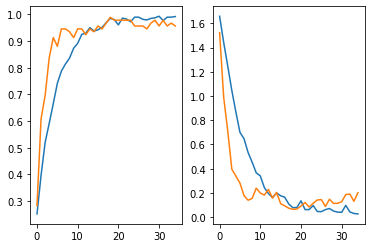

In [8]:
_, axarr = plt.subplots(1,2)

axarr[0].plot(history.history['accuracy'])
axarr[0].plot(history.history['val_accuracy'])

axarr[1].plot(history.history['loss'])
axarr[1].plot(history.history['val_loss'])